In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
annotatedUnan = pd.read_csv('toxicity_annotations_unanimous.tsv', sep='\t')

In [28]:
annotatedCommUnan = pd.read_csv('toxicity_annotated_comments_unanimous.tsv', sep='\t')

In [35]:
combined = annotatedCommUnan.merge(annotatedUnan, on='rev_id', how='left')

In [30]:
annotatedCommUnan['comment'].apply(lambda s: s.replace('NEWLINE_TOKEN', '').replace(':','').replace("`",''))

0       Is something like Managing_Urban_America going...
1       Here I cannot answer your questions.  I did no...
2                    In fact, I've just done it for you. 
3                                   1613 1 Jun 2003 (UTC)
4                                        I replied on .  
5                           HA AH AHA HAHAHAHHAHAHAHHAHAH
6        Request from Hi Tim - Is your page at  still ...
7       I unprotected  - assuming accidental/old vanda...
8       Oh - well - if you put it that way, all I can ...
9       Hi  I really appreciate that someone does good...
10                                  ]]* [[Medical Qi Gong
11      Probably. How long have you been editing anony...
12                              */Archive 5 < 1 July 2004
13      Just my two cents worth - I frequently hear bl...
14          I took up on your offer and withdrew myself. 
15        the ones who previously changed nationality ...
16      The last line does make it somewhat an objecti...
17            

In [66]:
datascores1 = combined[combined['toxicity_score']<0].drop_duplicates('rev_id', keep='first')

In [74]:
pd.options.display.max_colwidth = 100

In [78]:
datascores1['cleanedcomments']=datascores1['comment'].apply(lambda s: s.replace('NEWLINE_TOKEN', '').replace('==','').replace(':','').replace('`',''))

In [85]:
datascores1['commentLength'] = datascores1['cleanedcomments'].apply(lambda s: len(s))

In [90]:
combined['cleanedcomments']=combined['comment'].apply(lambda s: s.replace('NEWLINE_TOKEN', '').replace('==','').replace(':','').replace('`',''))

In [92]:
combined['commentLength']=combined['cleanedcomments'].apply(lambda s: len(s))

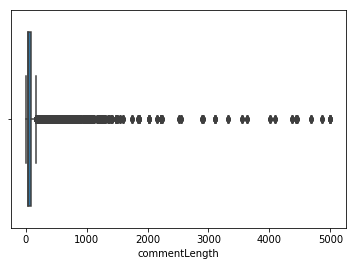

In [93]:
sns.boxplot(x='commentLength', data=combined)

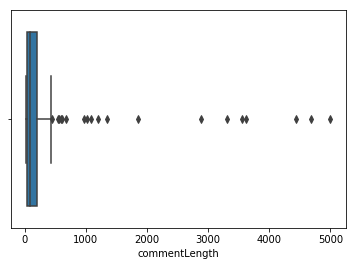

In [94]:
sns.boxplot(x='commentLength', data=datascores1)

In [112]:
import nltk
import string
from nltk.corpus import stopwords
from collections import Counter
nltk.download()


showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [ ]:
#def get_tokens():
#   with open('/opt/datacourse/data/parts/shakes-1.txt', 'r') as shakes:
#    text = shakes.read()
#    lowers = text.lower()
#    #remove the punctuation using the character deletion step of translate
#    no_punctuation = lowers.translate(None, string.punctuation)
#    tokens = nltk.word_tokenize(no_punctuation)
#    return tokens

#tokens = get_tokens()
#count = Counter(tokens)
#print count.most_common(10)

In [115]:
tokens= combined.apply(lambda row: nltk.word_tokenize(row["comment"]), axis=1)

LookupError: ("\n**********************************************************************\n  Resource 'tokenizers/punkt/PY3/english.pickle' not found.\n  Please use the NLTK Downloader to obtain the resource:  >>>\n  nltk.download()\n  Searched in:\n    - '/home/dan/nltk_data'\n    - '/usr/share/nltk_data'\n    - '/usr/local/share/nltk_data'\n    - '/usr/lib/nltk_data'\n    - '/usr/local/lib/nltk_data'\n    - ''\n**********************************************************************", 'occurred at index 0')